In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
hate_crime_df = pd.read_csv("hate_crime.csv", low_memory=False)

In [3]:
hate_crime_df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [4]:
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


### 1) What have been the overall trends of hate crime frequency over the years?

### Incidents per year for last 30 years

In [5]:
hate_crime_df_by_year = hate_crime_df["DATA_YEAR"].value_counts().sort_index()

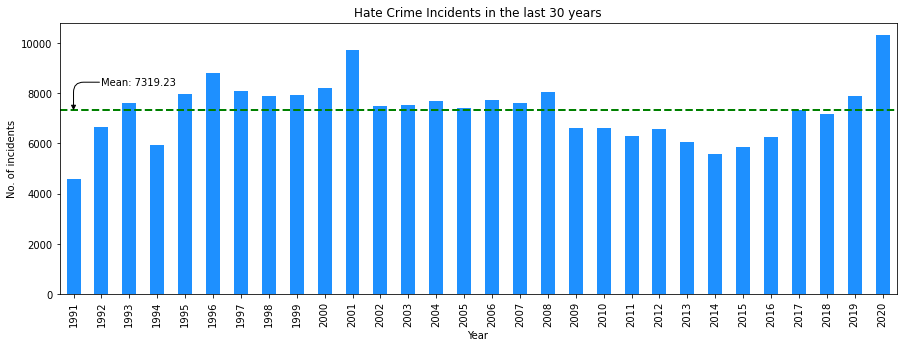

In [6]:
fig1, ax1 = plt.subplots()
fig1 = hate_crime_df_by_year.plot.bar(color='dodgerblue', figsize=(15,5))

ax1.set_xlabel("Year")
ax1.set_ylabel("No. of incidents")
ax1.set_title("Hate Crime Incidents in the last 30 years")

ym = hate_crime_df_by_year.mean()
ax1.axhline(ym, color='green', linewidth=2, linestyle = '--')
ax1.annotate('Mean: {:0.2f}'.format(ym), xy=(0, ym), xytext=(1,ym+1000),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.show()

#### Observations:
    1. Mid 90s onwards we see an increase in hate crimes which peaked in the year 2001
    2. 
    

### Incidents per Decade 

In [7]:
# Creating bins and label to add a coulmn for Decade 

decade_bins = [1990,2000,2010,2020]
decade_labels = ["2000","2010","2020"]

In [8]:
hate_crime_df["decade_ending"] = pd.cut(hate_crime_df["DATA_YEAR"],decade_bins,labels = decade_labels)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,decade_ending
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2000
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,2000
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,2000
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,2000
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,2000


In [9]:
hate_crime_df.groupby("decade_ending")[["INCIDENT_ID"]].count()

,INCIDENT_ID
decade_ending,
2000,73730
2010,76481
2020,69366


### Incidents per year for last 10 year

In [10]:
hate_crime_df_last_10yr = hate_crime_df[hate_crime_df["DATA_YEAR"]>2010]

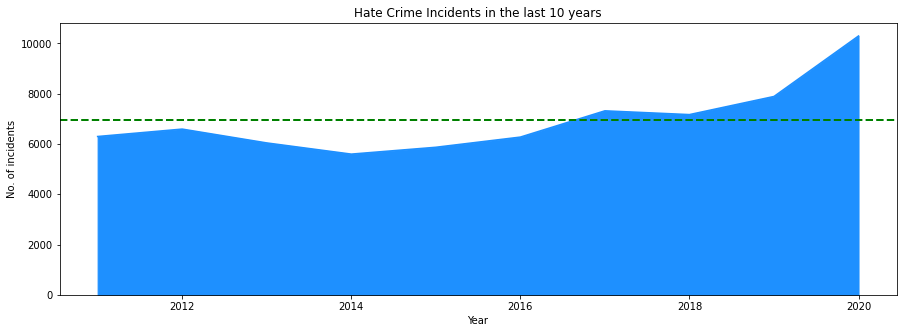

In [11]:
fig2, ax2 = plt.subplots()
fig2 = hate_crime_df_last_10yr["DATA_YEAR"].value_counts().sort_index().plot.area(color='dodgerblue', figsize=(15,5))

ax2.set_xlabel("Year")
ax2.set_ylabel("No. of incidents")
ax2.set_title("Hate Crime Incidents in the last 10 years")

ym = hate_crime_df_last_10yr["DATA_YEAR"].value_counts().mean()
ax2.axhline(ym, color='green', linewidth=2, linestyle = '--')
ax2.annotate('Mean: {:0.2f}'.format(ym), xy=(0, ym), xytext=(0,ym+1000),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.show()

In [12]:
bias_count_data = hate_crime_df.groupby("BIAS_DESC")["INCIDENT_ID"].count()
bias_count_data_df = pd.DataFrame(bias_count_data)
bias_count_data_df = bias_count_data_df.sort_values("INCIDENT_ID",ascending=False)
bias_count_data_df["% Distribution"] = bias_count_data_df["INCIDENT_ID"]/bias_count_data_df["INCIDENT_ID"].sum() * 100
bias_count_data_df["% Distribution"] = bias_count_data_df["% Distribution"].map('{:,.2f}%'.format)
bias_count_data_df.head()

,INCIDENT_ID,% Distribution
BIAS_DESC,,
Anti-Black or African American,74762,34.05%
Anti-Jewish,28013,12.76%
Anti-White,25193,11.47%
Anti-Gay (Male),21854,9.95%
Anti-Hispanic or Latino,14030,6.39%


In [13]:
hate_crime_df["OFFENSE_NAME"].nunique()

353

In [14]:
offense_count_data = hate_crime_df.groupby("OFFENSE_NAME")["INCIDENT_ID"].count().sort_values(ascending=False)
offense_count_data_df = pd.DataFrame(offense_count_data)
offense_count_data_df["% Distribution"] = offense_count_data_df["INCIDENT_ID"]/offense_count_data_df["INCIDENT_ID"].sum() * 100
offense_count_data_df["% Distribution"] =offense_count_data_df["% Distribution"].map('{:,.2f}%'.format)
offense_count_data_df.head(5)

,INCIDENT_ID,% Distribution
OFFENSE_NAME,,
Destruction/Damage/Vandalism of Property,66774,30.41%
Intimidation,64093,29.19%
Simple Assault,41719,19.00%
Aggravated Assault,22927,10.44%
Robbery,3703,1.69%


### Incident count for last 10 year region wise

In [42]:
# Cleaning Region_Name column to have only four major regions : Northeast, Midwest. South and West

hate_crime_df["REGION_NAME"] = hate_crime_df["REGION_NAME"].replace('U.S. Territories',np.nan)
hate_crime_df["REGION_NAME"] = hate_crime_df["REGION_NAME"].replace('Other', np.nan)
#hate_crime_df = hate_crime_df.dropna()
hate_crime_df["REGION_NAME"].unique()

array(['South', 'West', 'Northeast', 'Midwest', nan], dtype=object)

In [43]:
hate_crime_df_last_10yr_region = hate_crime_df[hate_crime_df["DATA_YEAR"]>=2009]
hate_crime_df_group_by_region_year = hate_crime_df_last_10yr_region.groupby(["DATA_YEAR","REGION_NAME"])

In [54]:
hate_crime_df_group_by_region_year_count = hate_crime_df_group_by_region_year["INCIDENT_ID"].count()

hate_crime_df_group_by_region_year_count

DATA_YEAR  REGION_NAME
2009       Midwest        1407
           Northeast      1878
           South          1352
           West           1976
2010       Midwest        1299
           Northeast      1891
           South          1372
           West           2071
2011       Midwest        1315
           Northeast      1693
           South          1303
           West           1988
2012       Midwest        1439
           Northeast      1810
           South          1470
           West           1875
2013       Midwest        1338
           Northeast      1648
           South          1286
           West           1772
2014       Midwest        1320
           Northeast      1499
           South          1133
           West           1647
2015       Midwest        1271
           Northeast      1473
           South          1344
           West           1782
2016       Midwest        1445
           Northeast      1564
           South          1313
           West 

In [36]:
color_region = {'Midwest':'tab:cyan','South':'tab:purple','Northeast':'tab:olive','West':'tab:red'}

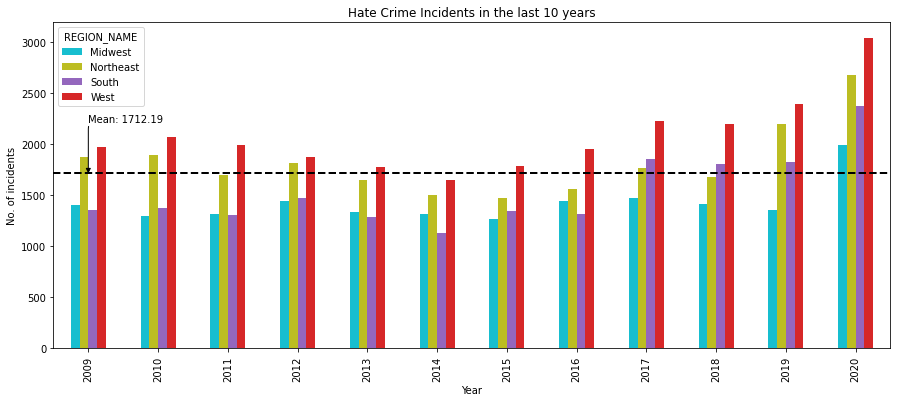

In [37]:
ax3 = hate_crime_df_group_by_region_year_count.unstack(fill_value=0).plot.bar(figsize=(15,6),color=color_region)

ax3.set_xlabel("Year")
ax3.set_ylabel("No. of incidents")
ax3.set_title("Hate Crime Incidents in the last 10 years")

ym = hate_crime_df_group_by_region_year_count.mean()
ax3.axhline(ym, color='black', linewidth=2, linestyle = '--')
ax3.annotate('Mean: {:0.2f}'.format(ym), xy=(0, ym), xytext=(0,ym+500),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.show()

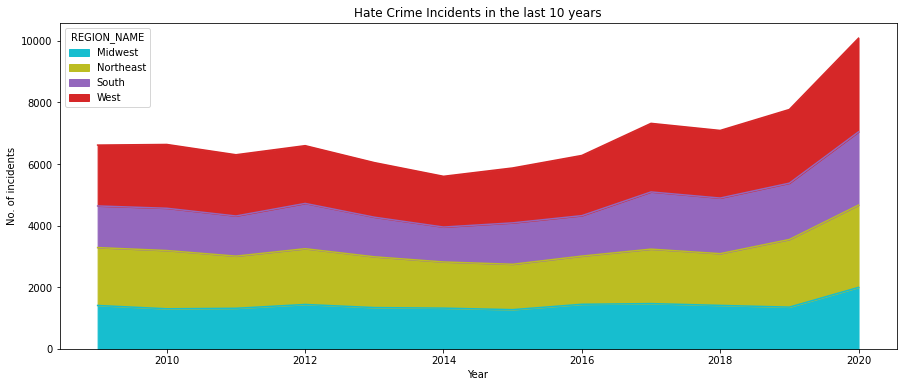

In [51]:
ax = hate_crime_df_group_by_region_year_count.unstack(fill_value=0).plot.area(figsize=(15,6),color=color_region)

ax.set_xlabel("Year")
ax.set_ylabel("No. of incidents")
ax.set_title("Hate Crime Incidents in the last 10 years")


plt.show()

In [39]:
region_incident_df = hate_crime_df[["decade_ending","REGION_NAME"]].value_counts().sort_index()

In [ ]:
ax4 = region_incident_df.unstack(fill_value=0).plot.bar(figsize=(15,6),color=color_region)

ax4.set_xlabel("Decade ending")
ax4.set_ylabel("No. of incidents")
ax4.set_title("Hate Crime Incidents over the last 3 Decades")

plt.show()

#### Importing census population data for better understanding of crime rate 

In [ ]:
pop_census_df = pd.read_csv("Census-Population-by-Region.csv")
pop_census_df

In [ ]:
# Filtering down to last 3 decades of population data required for anlysis

pop_census_df = pop_census_df[["State or Region","2020","2010","2000"]]
pop_census_df = pop_census_df.set_index("State or Region")
pop_census_df

In [ ]:
region_incident_df = hate_crime_df[["decade_ending","REGION_NAME"]].value_counts().sort_index()
region_incident_df

In [ ]:
region_incident_df = region_incident_df.reset_index()
region_incident_df = region_incident_df.rename(columns = {0:"Incident_Count"})
region_incident_df = region_incident_df[["decade_ending", "REGION_NAME", "Incident_Count"]]

In [ ]:
region_incident_df = region_incident_df.set_index(["decade_ending","REGION_NAME"])
region_incident_df

In [ ]:
# Populating a list with census population data and adding it as column to the region_incident_df datafrane
population_data = []
for index, row in region_incident_df.iterrows():
    population_data.append(pop_census_df[index[0]][index[1]])

region_incident_df["population"] = population_data
print(region_incident_df.info())
# The population column is of the type and needs to be converted to int
region_incident_df["population"] = region_incident_df["population"].convert_dtypes()
region_incident_df["population"] = region_incident_df["population"].str.replace(',','')
region_incident_df["population"] = region_incident_df["population"].astype(int)
print(" ")
region_incident_df.info()

In [ ]:
# Now we have the incident count and population data grouped by decade and region
region_incident_df

#### Calculating the crime rate per 100,000 people and plotting the data

In [ ]:
# Crime rate per 100000 = incident count / population * 100000

region_incident_df["crime_rate"] = (region_incident_df["Incident_Count"]/region_incident_df["population"]) * 100000
region_incident_df

In [ ]:
ax5 = region_incident_df["crime_rate"].unstack(fill_value=0).plot.bar(figsize=(15,6),color=color_region)

ax5.set_xlabel("Decade")
ax5.set_ylabel("Crime Rate per 100,000 people")
ax5.set_title("Hate Crime Incidents in the last 10 years")

ym = stats.hmean(region_incident_df["crime_rate"])
ax5.axhline(ym, color='black', linewidth=2, linestyle = '--')
ax5.annotate('H_Mean: {:0.2f}'.format(ym), xy=(0.3, ym), xytext=(0.3,ym+1),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.show()